# **CAPSTONE MODUL 2**

## **1. General Data Information**

## **1.1 Context**

Sebuah perusahaan bergerak di bidang speciality foods ingin mengetahui gambaran umum tentang bisnis yang sedang mereka jalankan. Terdapat sebuah database yang menunjukan detail dari keadaan bisnis di dalamnya. Dari database tersebut, perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk mengembangkan perusahaan ini.

## **1.2 Database Information**

Sumber Database: https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i

Database yang dimiliki mempunyai 13 tabel, yaitu:
- orders: berisikan detail transaksi seperti, order id, tanggal pengiriman, lokasi pengiriman, dsb
- employees: berisikan informasi karyawan seperti id, nama, jabatan, tanggal lahir, alamat tinggal, dsb
- employeesterritories: berisikan informasi id karyawan dan id daerah
- territories: berisikan informasi id daerah, dan deskrispsi daerah tersebut
- region: berisikan region id dan region description
- orderdetails: berisikan detail order seperti order id, product id, hargasatuan, quantity, discount
- products: berisikan informasi product seperti product id, supplier id, category, satuan, harga satuan, jumlah stok, jumlah unit dalam pemesanan, dsb
- categories: berisikan informasi kategori seperti, categoryid, categoryname, deskripsi, dan ilustrasi
- suppliers: berisikan informasi supplier seperti nama perusahaan supplier, PIC, jabatan PIC, detail alamat perusahaan supplier, nomor telepon, dsb
- customers: berisikan informasi customer seperti nama perusahaan pemesan, PIC, jabatan PIC, detail alamat perusahaan pemesan, nomor telepon dan lain sebagainya
- customercustomerdemo & customerdemographics: (tidak ada data yang tersedia)
- shippers: berikan informasi jasa delivery yang digunakan seperti, shipperid, nama perusahaan dan nomor telepon.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

## **2. SQL - Database**

## **2.1 Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database, database yang akan digunakan adalah database ``northwind``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.


In [3]:
# import libraries
import mysql.connector
import numpy as np
import pandas as pd

# create connection 
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    passwd = "password",
    database = "northwind")

# Second Method
mycursor = mydb.cursor()

# Create Function
def sql_df(yourQuery):
    mycursor.execute(yourQuery)
    myResult = mycursor.fetchall()
    df = pd.DataFrame(myResult, columns = mycursor.column_names)
    return df

### **sebelum menentukan tabel apa yang ingin digunakan, maka saya ingin menunjukan terlebih dahulu tabel yang tersedia atau bisa menggunakan diagram ERD**

In [2]:
sql_df('''
show tables;
''')

,Tables_in_northwind
0,categories
1,customercustomerdemo
2,customerdemographics
3,customers
4,employees
5,employeeterritories
6,orderdetails
7,orders
8,products
9,region


## **2.2 Data Detail**

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 5 tabel, yaitu tabel ```suppliers```, ```categories```, ```orderdetails```, ```orders``` dan ```products```. <br> 


### **Agar jelas, maka saya menunjukan isi kolom dari masing-masing tabel**

In [3]:
sql_df('''
select * from suppliers
limit 3; 
''')

,SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,None


In [4]:
sql_df('''
select * from orders
limit 3; 
''')

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.3800,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,None,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.6100,Toms Spezialitten,Luisenstr. 48,Mnster,None,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.8300,Hanari Carnes,"Rua do Pao, 67",Rio de Janeiro,RJ,05454-876,Brazil


In [5]:
sql_df('''
select * from orderdetails
limit 3;
''')

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0000,12,0.0
1,10248,42,9.8000,10,0.0
2,10248,72,34.8000,5,0.0


In [6]:
sql_df('''
select * from products
limit 3;
''')

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.0000,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0000,13,70,25,0


In [7]:
sql_df('''
select * from categories
limit 3;
''')

,CategoryID,CategoryName,Description,Picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",b'FFD8FFE000104A46494600010200006400640000FFEC...
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",b'FFD8FFE000104A46494600010200006400640000FFEC...
2,3,Confections,"Desserts, candies, and sweet breads",b'FFD8FFE000104A46494600010200006400640000FFEC...


Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan.
Informasi yang diambil antara lain adalah:

Dari tabel suppliers:
- supplierid
- companyname
- contactname
- contacttitle
- city
- country

Dari tabel products:
- productname
- unitsinstock
- unitprice
- reorderlevel

Dari tabel orderdetails:
- quantitiy

Dari tabel order:
- orderdate
- requireddate
- freight
- shipcity
- shipcountry

Selain dari tabel, terdapat sebuah kolom baru yang dinamakan ReorderQuantity yang merupakan selisih antara jumlah yang diorder (```quantity``` dari tabel orderdetails) dan jumlah stock tersedia (```UnitsInStock``` dari tabel products). 

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.


## **2.3 TABLE CREATION - Tabel 1**

**Tabel ini yang akan dijadikan acuan analisis kedepannya**

In [4]:
tabel1 = sql_df('''
select s.SupplierID, s.CompanyName, s.ContactName, s.ContactTitle, s.City, s.Country, 
    c.categoryname,
    p.ProductName, p.UnitsInStock, p.UnitPrice, p.reorderlevel,
    od.quantity,
    o.orderdate, o.requireddate, o.freight, o.shipcity, o.shipcountry
from suppliers as s
left  join products as p
on s.supplierid = p.supplierid
left join categories as c
on p.categoryid = c.categoryid
left join orderdetails as od
on p.productid = od.productid
left join orders as o
on o.orderid = od.orderid;
''')
tabel1

,SupplierID,CompanyName,ContactName,ContactTitle,City,Country,categoryname,ProductName,UnitsInStock,UnitPrice,reorderlevel,quantity,orderdate,requireddate,freight,shipcity,shipcountry
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0000,10,45,1996-08-20,1996-09-17,76.8300,Cunewalde,Germany
1,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0000,10,18,1996-08-30,1996-09-27,147.2600,Albuquerque,USA
2,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0000,10,20,1996-09-30,1996-10-28,12.6900,Portland,USA
3,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0000,10,15,1996-11-07,1996-12-05,0.7800,Stuttgart,Germany
4,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0000,10,12,1996-11-14,1996-12-12,53.8000,Mxico D.F.,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,29,Forts d'rables,Chantal Goulet,Accounting Manager,Ste-Hyacinthe,Canada,Confections,Tarte au sucre,17,49.3000,0,60,1998-03-13,1998-04-10,74.4400,Tsawassen,Canada
2151,29,Forts d'rables,Chantal Goulet,Accounting Manager,Ste-Hyacinthe,Canada,Confections,Tarte au sucre,17,49.3000,0,12,1998-03-20,1998-04-17,27.1900,Bern,Switzerland
2152,29,Forts d'rables,Chantal Goulet,Accounting Manager,Ste-Hyacinthe,Canada,Confections,Tarte au sucre,17,49.3000,0,40,1998-03-31,1998-04-28,61.1400,Albuquerque,USA
2153,29,Forts d'rables,Chantal Goulet,Accounting Manager,Ste-Hyacinthe,Canada,Confections,Tarte au sucre,17,49.3000,0,21,1998-04-16,1998-05-14,52.5200,Tsawassen,Canada


## **2.4 TABLE CREATION - Tabel 2**

Data yang kedua ini merupakan informasi yang bisa menjadi data tambahan untuk melihat kategori produk, dan asal negara supplier beserta total supplier di negara tersebut dan juga harga rata rata per produknya. Disini kita bisa melihat misalnya untuk kategori Beverages, France memiliki harga rata-rata yang relatif lebih mahal dibanding yang lainnya

In [9]:
tabel2 = sql_df('''
select  c.categoryname, s.country, count(distinct s.supplierid) as total_supplier_negara, round(avg(p.unitprice),2) as hargaratarata
from suppliers as s
left join products as p
on s.supplierid = p.supplierid
left join categories as c
on p.categoryid = c.categoryid
group by  c.categoryname, country
having c.categoryname = 'Beverages'
order by  c.categoryname, total_supplier_negara, hargaratarata desc;;
''')
tabel2

,categoryname,country,total_supplier_negara,hargaratarata
0,Beverages,France,1,140.75
1,Beverages,Singapore,1,46.00
2,Beverages,UK,1,18.50
3,Beverages,Finland,1,18.00
4,Beverages,USA,1,15.33
5,Beverages,Australia,1,15.00
6,Beverages,Germany,1,7.75
7,Beverages,Brazil,1,4.50



## **2.5 TABLE CREATION - Tabel 3**

**Negara dengan supplier terbanyak**

In [10]:
tabel3 = sql_df('''select country, count(distinct supplierid) as total_supplier_negara
from suppliers
group by country
order by total_supplier_negara desc
''')
tabel3

,country,total_supplier_negara
0,USA,4
1,France,3
2,Germany,3
3,Australia,2
4,Canada,2
5,Italy,2
6,Japan,2
7,Sweden,2
8,UK,2
9,Brazil,1



# **3. DATA MANIPULATION**

**THE OBJECTIVES**
* ANY ANOMALIES? (MISSING VALUE, OUTLIER, DATA FORMATTING, DOUBLE DATA? 
* HOW TO DEAL WITH THE ANOMALIES? 
* IF THERE’S NO ANOMALIES, PROVE IT 
<br>

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```tabel1```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## **3.1 General Information For Data**

In [11]:
#Check Info Tabel
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SupplierID    2155 non-null   int64         
 1   CompanyName   2155 non-null   object        
 2   ContactName   2155 non-null   object        
 3   ContactTitle  2155 non-null   object        
 4   City          2155 non-null   object        
 5   Country       2155 non-null   object        
 6   categoryname  2155 non-null   object        
 7   ProductName   2155 non-null   object        
 8   UnitsInStock  2155 non-null   int64         
 9   UnitPrice     2155 non-null   object        
 10  reorderlevel  2155 non-null   int64         
 11  quantity      2155 non-null   int64         
 12  orderdate     2155 non-null   datetime64[ns]
 13  requireddate  2155 non-null   datetime64[ns]
 14  freight       2155 non-null   object        
 15  shipcity      2155 non-null   object  

## **3.2 CHANGING DATA TYPE, MISSING VALUE & ANOMALY**

## **Melihat Data Sekilas Dari General Info**

Mari sejenak melihat apa yang ditampilkan pada general info yang disajikan di atas. Terlihat bahwa secara keseluruhan terdapat 2155 baris data dengan total 17 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada object, integer, datetime dan float. Oke, mari sejenak mengesampingkan tipe data. Mari berforkus pada non-null values atau data yang tersedia pada setiap kolomnya. Jika melihat informasi tersebut, semua kolom atau feature yang memiliki data lengkap.

Fokus berikutnya adalah perhatikan pada features berikut ini: 
1. UnitPrice
2. freight


Ada apa dengan kedua tipe data tersebut? Mari kita cari tahu. Yang pertama pada tipe data unitPrice, freight. Kedua feature ini merupakan feature yang seharusnya memiliki tipe data numerik (dibuktikan pada preview data di bagian sebelumnya), sedangkan yang terbaca tipe data dari ketiga feature ini adalah object. Artinya, kedua feature ini tidak dianggap memiliki komponen data yang numerik. Tentu saja hal tersebut harus ditanggulangi, mengingat ke depannya data yang bersifat numerik ini akan digunakan.

Oleh karena itu, kedua features ini juga harus ditanggulangi dengan cara mengubah tipe datanya. Dari kedua penjelasan tersebut, maka **kesimpulan keduanya adalah terdapat features yang memiliki tipe data yang salah dan harus diubah sesuai dengan tipe data seharusnya.**

## **Missing Values**


In [12]:
# Check Missing Value Percentage
tabel1.isnull().sum()

SupplierID      0
CompanyName     0
ContactName     0
ContactTitle    0
City            0
Country         0
categoryname    0
ProductName     0
UnitsInStock    0
UnitPrice       0
reorderlevel    0
quantity        0
orderdate       0
requireddate    0
freight         0
shipcity        0
shipcountry     0
dtype: int64

Tidak terdapat missing value

## **Mengubah Tipe Data Yang Salah**

Oke, telah disebutkan juga sebelumnya bahwa ada tipe data yang tidak sesuai. Kedua features tersebut terlebih dahulu diubah agar fungsionalitasnya bisadigunakan. Numerik akan diperlakukan sebagai tipe data numerik. Tujuannya tentu saja agar features tersebut dapat dipergunakan sebagaimana mestinya.

In [13]:
# Change Spesific Column To numeric Format
tabel1['UnitPrice'] = pd.to_numeric(tabel1['UnitPrice'])
tabel1['freight'] = pd.to_numeric(tabel1['freight'])

## **Recheck Data Information**

Bagian sebelumnya, 2 features yang memiliki tipe data yang salah sudah diubah ke dalam tipe data yang seharusnya. Untuk memastikannya, output di atas merupakan informasi umum yang kembali diperlihatkan untuk memastikan tipe data yang sudah diubah tersebut. Mari fokus ke kedua data yang sudah disebutkan sebelumnya. Dengan demikian, perubahan yang dilakukan sebelumnya sudah terimplementasi dan anomali yang kedua sudah teratasi. 

In [14]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SupplierID    2155 non-null   int64         
 1   CompanyName   2155 non-null   object        
 2   ContactName   2155 non-null   object        
 3   ContactTitle  2155 non-null   object        
 4   City          2155 non-null   object        
 5   Country       2155 non-null   object        
 6   categoryname  2155 non-null   object        
 7   ProductName   2155 non-null   object        
 8   UnitsInStock  2155 non-null   int64         
 9   UnitPrice     2155 non-null   float64       
 10  reorderlevel  2155 non-null   int64         
 11  quantity      2155 non-null   int64         
 12  orderdate     2155 non-null   datetime64[ns]
 13  requireddate  2155 non-null   datetime64[ns]
 14  freight       2155 non-null   float64       
 15  shipcity      2155 non-null   object  

## **Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

In [15]:
tabel1[tabel1.duplicated()]

,SupplierID,CompanyName,ContactName,ContactTitle,City,Country,categoryname,ProductName,UnitsInStock,UnitPrice,reorderlevel,quantity,orderdate,requireddate,freight,shipcity,shipcountry



## **3.3 ADD NEW FEATURE & DIVE IN EACH FEATURE**

## **Feature 'ReorderQuantity'**

Data awal menunjukan terdapat 2 features yang menggambarkan jumlah stock yang tersedia dan jumlah stock yang diorder. Oleh karena itu, karena fokus analisis kita adalah supplier maka kita akan membuat features baru yang menunjukan jumlah yang harus segera diorder karena, jumlah yang diorder lebih banyak dari stock yang tersedia. Dengan asumsi ```quantity``` dari tabel order adalah banyaknya barang yang diorder sedangkan ```unitinstock```  adalah jumlah barang yang tersedia.


In [16]:
#nambah feature
tabel1['ReorderQuantity'] = tabel1[['quantity', 'UnitsInStock']].apply(lambda x:(x['quantity'] - x['UnitsInStock']), axis = 1)
tabel1['ReorderQuantity'] = np.where(tabel1['ReorderQuantity'] < 0, 0, tabel1['ReorderQuantity'])
tabel1.head()

,SupplierID,CompanyName,ContactName,ContactTitle,City,Country,categoryname,ProductName,UnitsInStock,UnitPrice,reorderlevel,quantity,orderdate,requireddate,freight,shipcity,shipcountry,ReorderQuantity
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0,10,45,1996-08-20,1996-09-17,76.83,Cunewalde,Germany,6
1,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0,10,18,1996-08-30,1996-09-27,147.26,Albuquerque,USA,0
2,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0,10,20,1996-09-30,1996-10-28,12.69,Portland,USA,0
3,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0,10,15,1996-11-07,1996-12-05,0.78,Stuttgart,Germany,0
4,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0,10,12,1996-11-14,1996-12-12,53.80,Mxico D.F.,Mexico,0


Untuk barang yang jumlah stocknya lebih banyak dari yang diorder maka kita akan buat 0, sehingga tidak perlu diorder ke supplier karena stock masih tersedia. kemudian kita akan mengecek apakah ada nilai yang aneh

In [17]:

tabel1['ReorderQuantity'].value_counts()

0     1365
10      41
15      41
20      40
3       38
      ... 
90       1
69       1
54       1
62       1
63       1
Name: ReorderQuantity, Length: 80, dtype: int64

In [18]:
tabel1.isnull().sum()

SupplierID         0
CompanyName        0
ContactName        0
ContactTitle       0
City               0
Country            0
categoryname       0
ProductName        0
UnitsInStock       0
UnitPrice          0
reorderlevel       0
quantity           0
orderdate          0
requireddate       0
freight            0
shipcity           0
shipcountry        0
ReorderQuantity    0
dtype: int64

## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [19]:
# Clean Data

tabel1.sample(10)

,SupplierID,CompanyName,ContactName,ContactTitle,City,Country,categoryname,ProductName,UnitsInStock,UnitPrice,reorderlevel,quantity,orderdate,requireddate,freight,shipcity,shipcountry,ReorderQuantity
961,12,Plutzer Lebensmittelgromrkte AG,Martin Bein,International Marketing Mgr.,Frankfurt,Germany,Beverages,Rhnbru Klosterbier,125,7.75,25,30,1998-04-03,1998-04-17,20.31,Warszawa,Poland,0
2080,28,Gai pturage,Eliane Noz,Sales Representative,Annecy,France,Dairy Products,Camembert Pierrot,19,34.00,0,4,1998-04-30,1998-05-28,10.98,Torino,Italy,0
27,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.00,10,10,1998-02-26,1998-03-26,38.19,Sevilla,Spain,0
1349,17,Svensk Sjfda AB,Michael Bjrn,Sales Representative,Stockholm,Sweden,Seafood,Rd Kaviar,101,15.00,5,3,1997-06-04,1997-07-02,72.97,Colchester,UK,0
94,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,New Orleans,USA,Condiments,Chef Anton's Cajun Seasoning,53,22.00,0,20,1996-09-19,1996-10-17,47.30,Cork,Ireland,0
490,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,Melbourne,Australia,Seafood,Carnarvon Tigers,42,62.50,0,4,1998-03-09,1998-04-06,47.59,Resende,Brazil,0
501,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,Melbourne,Australia,Condiments,Vegie-spread,24,43.90,5,35,1997-01-29,1997-03-12,56.63,Cork,Ireland,11
1459,19,New England Seafood Cannery,Robb Merchant,Wholesale Account Agent,Boston,USA,Seafood,Jack's New England Clam Chowder,85,9.65,10,13,1996-11-11,1996-12-09,162.33,Graz,Austria,0
266,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,Tokyo,Japan,Produce,Longlife Tofu,4,10.00,5,15,1997-12-31,1998-01-28,22.11,Lyon,France,11
1179,15,Norske Meierier,Beate Vileid,Marketing Manager,Sandvika,Norway,Dairy Products,Gudbrandsdalsost,26,36.00,15,10,1997-04-02,1997-04-30,10.64,Toulouse,France,0


## **General Info Cleaned Data**

In [20]:
listItem = []
for col in tabel1.columns :
    listItem.append([col, tabel1[col].dtype, len(tabel1),tabel1[col].isna().sum(), round((tabel1[col].isna().sum()/len(tabel1[col])) * 100,2),
                    tabel1[col].nunique(), list(tabel1[col].drop_duplicates().sample(2).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,SupplierID,int64,2155,0,0.0,29,"[4, 16]"
1,CompanyName,object,2155,0,0.0,29,"[Grandma Kelly's Homestead, Heli Swaren GmbH &..."
2,ContactName,object,2155,0,0.0,29,"[Robb Merchant, Charlotte Cooper]"
3,ContactTitle,object,2155,0,0.0,15,"[Sales Manager, Owner]"
4,City,object,2155,0,0.0,29,"[New Orleans, Boston]"
5,Country,object,2155,0,0.0,17,"[Australia, Denmark]"
6,categoryname,object,2155,0,0.0,8,"[Dairy Products, Seafood]"
7,ProductName,object,2155,0,0.0,77,"[Tofu, Gustaf's Knckebrd]"
8,UnitsInStock,int64,2155,0,0.0,51,"[57, 111]"
9,UnitPrice,float64,2155,0,0.0,62,"[15.0, 9.2]"


## **Data Outlier**

In [21]:
tabel1['UnitPrice'].describe()

count    2155.000000
mean       27.948687
std        31.610706
min         2.500000
25%        12.500000
50%        19.450000
75%        34.000000
max       263.500000
Name: UnitPrice, dtype: float64

In [24]:
# Outlier Check With Function

Q1_amount = tabel1['UnitPrice'].describe()['25%']
Q3_amount = tabel1['UnitPrice'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = tabel1[(tabel1['UnitPrice'] < Q1_amount - (1.5 * iqr)) | (tabel1['UnitPrice']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = tabel1[(tabel1['UnitPrice'] > Q1_amount - (1.5 * iqr)) & (tabel1['UnitPrice']< Q3_amount + (1.5 * iqr)) ].index
tabel1.loc[outlier_index]

,SupplierID,CompanyName,ContactName,ContactTitle,City,Country,categoryname,ProductName,UnitsInStock,UnitPrice,reorderlevel,quantity,orderdate,requireddate,freight,shipcity,shipcountry,ReorderQuantity
218,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,Tokyo,Japan,Meat/Poultry,Mishi Kobe Niku,29,97.0,0,20,1997-01-21,1997-02-18,44.12,Resende,Brazil,0
219,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,Tokyo,Japan,Meat/Poultry,Mishi Kobe Niku,29,97.0,0,16,1997-04-23,1997-05-07,204.47,Cunewalde,Germany,0
220,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,Tokyo,Japan,Meat/Poultry,Mishi Kobe Niku,29,97.0,0,50,1997-09-30,1997-10-28,296.43,Cork,Ireland,21
221,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,Tokyo,Japan,Meat/Poultry,Mishi Kobe Niku,29,97.0,0,6,1997-10-06,1997-10-20,139.34,Seattle,USA,0
222,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,Tokyo,Japan,Meat/Poultry,Mishi Kobe Niku,29,97.0,0,3,1998-01-23,1998-02-20,38.24,London,UK,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,18,Aux joyeux ecclsiastiques,Guylne Nodier,Sales Manager,Paris,France,Beverages,Cte de Blaye,17,263.5,15,60,1998-02-02,1998-02-16,348.14,Cunewalde,Germany,43
1378,18,Aux joyeux ecclsiastiques,Guylne Nodier,Sales Manager,Paris,France,Beverages,Cte de Blaye,17,263.5,15,40,1998-02-16,1998-03-16,280.61,Albuquerque,USA,23
1379,18,Aux joyeux ecclsiastiques,Guylne Nodier,Sales Manager,Paris,France,Beverages,Cte de Blaye,17,263.5,15,5,1998-03-20,1998-04-17,87.38,Paris,France,0
1380,18,Aux joyeux ecclsiastiques,Guylne Nodier,Sales Manager,Paris,France,Beverages,Cte de Blaye,17,263.5,15,60,1998-03-27,1998-04-24,193.37,Rio de Janeiro,Brazil,43



## **3.4 BUILT-IN FUNCTION PANDAS TO GET INSIGHT**

## **Category Produk yang memiliki harga rata-rata termahal & termurah**

In [ ]:
# Groupping

tabel1[['UnitPrice','categoryname']].groupby('categoryname').describe()

UnitPrice                                                     \
                   count       mean        std    min    25%    50%     75%   
categoryname                                                                  
Beverages          404.0  31.185644  59.217073   4.50  14.00  18.00  18.000   
Condiments         216.0  22.625926   9.363812  10.00  15.50  21.05  25.875   
Confections        334.0  24.170988  18.819230   9.20  10.00  17.45  31.230   
Dairy Products     366.0  28.887705  15.078966   2.50  21.00  34.00  36.000   
Grains/Cereals     196.0  22.668367  12.087728   7.00  12.75  19.50  38.000   
Meat/Poultry       173.0  45.858266  40.573971   7.45  24.00  32.80  39.000   
Produce            136.0  37.377206  14.262799  10.00  23.25  45.60  53.000   
Seafood            330.0  20.113424  14.745665   6.00   9.65  18.40  25.890   

                        
                   max  
categoryname            
Beverages       263.50  
Condiments       43.90  
Confections      81.00  
Dairy Products   55.00  
Grains/Cereals   38.00  
Meat/Poultry    123.79  
Produce          53.00  
Seafood          62.50

Terdapat sebuah feature yang bernama ```categoryname``` pada dataset. Feature ini merupakan daftar category produk yang dijual. Category sendiri memiliki 8 golongan/kategori, ada ```'Beverages', 'Condiments', 'Confections', 'Dairy Products', 'Grains/Cereals', 'Meat/Poultry', 'Produce', dan 'Seafood'```. Jika melihat dari UnitPrice, rata-rata harga Meat/Poultry lebih tinggi dari yang lain, seafood lebih rendah dari yang lain. Sedangkan seafood memiliki rata-rata harga satuan termurah. 

## **Daftar Supplier Yang Produknya Harus Segera Diorder Kembali** 

In [ ]:
tabel3 = pd.pivot_table(data = tabel1, index = ['CompanyName'], values = ['ReorderQuantity'], aggfunc = "sum")
tabel3.sort_values(by = 'ReorderQuantity', ascending = False, inplace = True)
tabel3.head()

,ReorderQuantity
CompanyName,
Formaggi Fortini s.r.l.,1952
"Pavlova, Ltd.",1738
"Specialty Biscuits, Ltd.",1683
Plutzer Lebensmittelgromrkte AG,1234
"G'day, Mate",1088


Tabel ini menjelaskan daftar company company yang harus segera diorder kembali produknya, karena jumlah kuantitas yang diorder lebih tinggi dari jumlah stock tersedia.

## **Persebaran Negara Supplier dan Majoritas Kategori Produk Yang di Supply** 

In [ ]:
pd.crosstab(tabel1['Country'],tabel1['categoryname'])

categoryname,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
Country,,,,,,,,
Australia,39,17,43,0,29,67,39,27
Brazil,51,0,0,0,0,0,0,0
Canada,0,24,48,0,0,69,0,0
Denmark,0,0,0,0,0,0,0,41
Finland,39,0,31,0,0,0,0,0
France,54,0,0,105,0,0,0,18
Germany,46,38,59,0,30,32,33,32
Italy,0,0,0,104,73,0,0,0
Japan,0,6,0,0,0,5,35,73


Terlihat dari tabel diatas bahwa UK paling banyak mensupply produk berkategori ```Beverages & Confections```, USA untuk ```Condiments```, sedangkan supplier ```Dairy Products``` tersebar di France, Italy dan Norway. Untuk ```Grain dan Cereals```, Italy merupakan pensupply terbesar. Sedangkan untuk ```Meat/Poultry``` jumlah negara pensupply rekatively dikit yaitu hanya Germany, Japan, Canada dan Australia. Untuk kategori ```Produce``` pensupply terbanyaknya adalah Australia sedangkan untuk ```Seafood```, USA adalah negara penyupply terbanyak.


# **4. DATA INSIGHT (DATA VISUALIZATION, STATISTICS)**

Digunakan gabungan pengguanaan Tableau dan python sesuai dengan kebutuhan. Untuk penggunaan tableau dipilih saat akan menganalisis dan menampilkan visualisasi yang dirasa lebih kompleks dan lebih mudah digunakan menggunakan tableau. 

In [ ]:
!pip install openpyxl

You should consider upgrading via the 'C:\Users\Salsabila\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
#save data ke format excel
tabel1.to_excel(r'C:\Users\Salsabila\Desktop\Purwadhika\capstone\Capstone Project Modul 2\project2.xlsx', index = False)

## 4.1 **Negara Penyumbang Supplier**

## **Analysis 1: Negara Asal Supplier**

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1648737112190' style='position: relative'><noscript><a href='#'><img alt='Sheet 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project2_16487368400830&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648737112190');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Jika melihat data dari grafik di atas, kita akan menemukan manakah negara dengan supplier terbanyak dan terendah. Dan negara USA menempati posisi utama dalam hal  supplier terbanyak, kita memperlukan analisis lanjutan, apa yang yang membuat USA menjadi supplier terbanyak, apakah disebabkan karena jumlah kategori produk yang di supply lebih banyak, atau harga yang ditawarkan dari supplier-supplier yang berasal dari USA lebih murah?



## **Analysis 2: Kuantitas Barang Yang Diorder Per Negara Per Kategori**

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1648799921744' style='position: relative'><noscript><a href='#'><img alt='&lt;Kuantitas Barang Yang Di Order Per Negara Per Kategori&gt; ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;1_1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project2_16487368400830&#47;1_1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;1_1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648799921744');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Dapat dilihat dari grafik tersebut, ternyata jumlah order yang diterima dari pelanggan terhadap barang-barang yang di supply dari supplier di USA juga paling banyak dibandingkan negara lain. Meskipun secara keberagaman produk Germany dan Asutralia lebih beragam. Selanjutnya kita akan mengecek apakah harga rata-rata per unit yang di tawarkan dari supplier yang berlokasi di USA lebih murah dibandingkan dengan supplier di negara lain.

## **Analysis 3: Rata-Rata Harga Satuan Per Negara Per Kategori**


In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1648804442775' style='position: relative'><noscript><a href='#'><img alt='&lt;Rata-Rata Harga Satuan&gt; ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;1_2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project2_16487368400830&#47;1_2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;1_2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648804442775');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Dapat dilihat dari grafik diatas, Avg. Unit Price yang merupakan Rata-Rata Harga Satuan menjadi sumbu x dan Country atau Negara sebagai sumbu y, dan diurutkan berdasarkan rata-rata harga satuan dari yang tertinggi ke terendah. Dan difilter berdasarkan kategori yang hanya di supply oleh negara USA saja agar lebih fair saat membandingkan.

Dapat dilihat dalam kategori yang sama USA memiliki rata-rata harga satuan lebih rendah relatif terhadap supplier lainnya di negara lain.

Hal ini bisa menjadi bahan pertimbangan dan juga negosiasi dengan supplier di negara lain untuk mensupply harga bahan lebih rendah atau sesuai rata-rata harga market supplier lainnya. Misalnya kita bisa bernegosiasi dengan supplier Beverages dari France, atau seafood dari Australia, agar kita bisa mendapatkan profit yang lebih tinggi. 

Ditambah lagi berdasarkan grafik sebelumnya jumlah order untuk barang-barang yang di supply dari negara tersebut juga banyak. Oleh karena itu, kita bisa memanfaatkan grafik ini sebagai dasar pertimbangan bernegosiasi.

(Dengan asumsi berat/jumlah mL dalam kategori yang sama dengan supplier yang berbeda sama)


## 4.2 **Produk Yang Harus Reorder**

## **Analysis 1: List Produk Yang Harus Segera Reorder**


In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1648810760675' style='position: relative'><noscript><a href='#'><img alt='&lt;List Produk Yang Harus Reorder&gt; ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;22&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project2_16487368400830&#47;22' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;22&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648810760675');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Dari grafik ini dapat dilihat perbandingan dari Jumlah Order masuk dari kolom quantity di table orderdetails dan Jumlah Stock Tersedia dari kolom UnitsInStock dari tabel products. Dan telah dibuat juga features ReorderQuantity, yang merupakan jumlah produk yang harus direorder karena stocknya menipis. Dengan hasil pengurangan Jumlah Order yang Masuk - Stock Tersedia.

Dapat dilihat dari grafik menunjukan nama nama suppliernya, dan juga angka untuk menunjukan berapa banyak product yang harus kita reorder dari company tersebut. Dan grafik ini disortir berdasarkan jumlah produk tersedia paling sedikit ke yang paling banyak. Karena jumlah produk tersedia paling sedikit menandakan kondisi urgent agar company bisa mengambil tindakan untuk mengorder barang tersebut ke supplier karena sudah ada orderan dari pelanggan.

## 4.3 **Total Sales Per Kategori**

## **Analysis 1: Total Sales Per Kategori**

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1648817744119' style='position: relative'><noscript><a href='#'><img alt='&lt;Tipe Produk Dengan Penjualan Tertinggi&gt; ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;Sheet4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project2_16487368400830&#47;Sheet4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;Sheet4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648817744119');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Dapat dilihat dari grafik yang mengambarkan total penjualan tertinggi berdasarkan kategorinya. Total sales dibuat dengan calculated field mengalikan jumlah order dengan harga satuan. Kemudian dapat langsung dilihat dari size lingkarannya bahwa penjualan tertinggi ada di dairy products & beverages. Dan terendah adalah grains/cereal. Selanjutnya kita akan menganalisis lebih jauh apa yang menyebabkan total sales terendah dan teringgi, apakah karena sesuai dengan kebutuhan pelanggan, minat pelanggan, atau karena memang unit pricenya yang lebih murah. Kita akan analisis lebih jauh di grafik selanjutnya.

## **Analysis 2: Total Sales Per Kategori & Dibandingkan Dengan Harga Satuan Serta Tingkat Reorder**

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1648820681990' style='position: relative'><noscript><a href='#'><img alt='&lt;Total Sales Vs Harga Satuan&gt; ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;3_2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project2_16487368400830&#47;3_2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;3_2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648820681990');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Dapat dilihat dari grafik diatas yang membandingkan ```rata-rata harga satuan product``` dan ```total sales``` beserta ```tingkat reorder``` dengan asumsi tingkat reorder/reorder level adalah banyaknya suatu kategori dibeli oleh pelanggan berulang kali.

Dari grafik sebelumnya kita ingin mengecek apa yang membuatkan total sales tertinggi dan terendah. Dari grafik didapat bar chart menunjukan ```rata-rata harga satuan product``` sedangkan line untuk menunjukan ```total sales```, seharusnya digunakan dot dan garis putus-putus namun karena keterbatasan feature pada tableau public maka digunakan line. Dan warna menggambarkan tingkat reorder semakin pekat menandakan produk semakin banyak di reorder dari grafik dapat diambil beberapa kesimpulan:
- Beverages memiliki warna yang paling pekat menunjukan tingkat reorder yang tinggi hal ini bersesuaian mengapa total salesnya tinggi walaupun harga rata rata satuannya tidak yang paling mahal, hal ini bisa jadi karena kebutuhan masyarakat terhadap beverages lebih besar dibandingkan kategori lainnya
- Kemudian untuk Meat/Poultry walaupun memiliki harga rata-rata satuannya tinggi namun tidak menyebabkan total salesnya lebih besar dari beverages, hal ini bisa ditelusuri lebih jauh lagi apakah harga meat/poultry yang kita jual lebih mahal dari toko lainnya. Atau memang kebutuhan masyarakat lebih sedikit untuk Meat/poultry. Dari tingkat reorder juga menunjukan bahwa Meat/pultry memiliki tingkat reorder yang relatively rendah
- Hal yang terjadi pada kategori Meat/Poultry juga terjadi pada kategori Produce. Dan bisa ditelusuri lebih jauh lagi

## **Analysis 3: Korelasi Antara Harga Satuan Dengan Reorderlevel**

In [ ]:
tabel1[tabel1['categoryname'] == 'Meat/Poultry'][['UnitPrice','reorderlevel']].corr()

,UnitPrice,reorderlevel
UnitPrice,1.000000,-0.511242
reorderlevel,-0.511242,1.000000


Untuk menjawab pertanyaan diatas terkait apakah harga daging yang mahal berkorelasi dengan tingkat reorder, hal tersebut dapat dipastikan bahwa berkorelasi tebalik memiliki arah hubungan ngeatif dan sedang. Jadi, bisa saja harga mempengaruhi faktor orang membeli kembali. Jadi, bisa saja semakin mahal harganya Meat/Pultry maka tingkat reordernya cenderung lebih rendah.

## 4.4 **Jumlah Order Sepanjang Waktu**


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

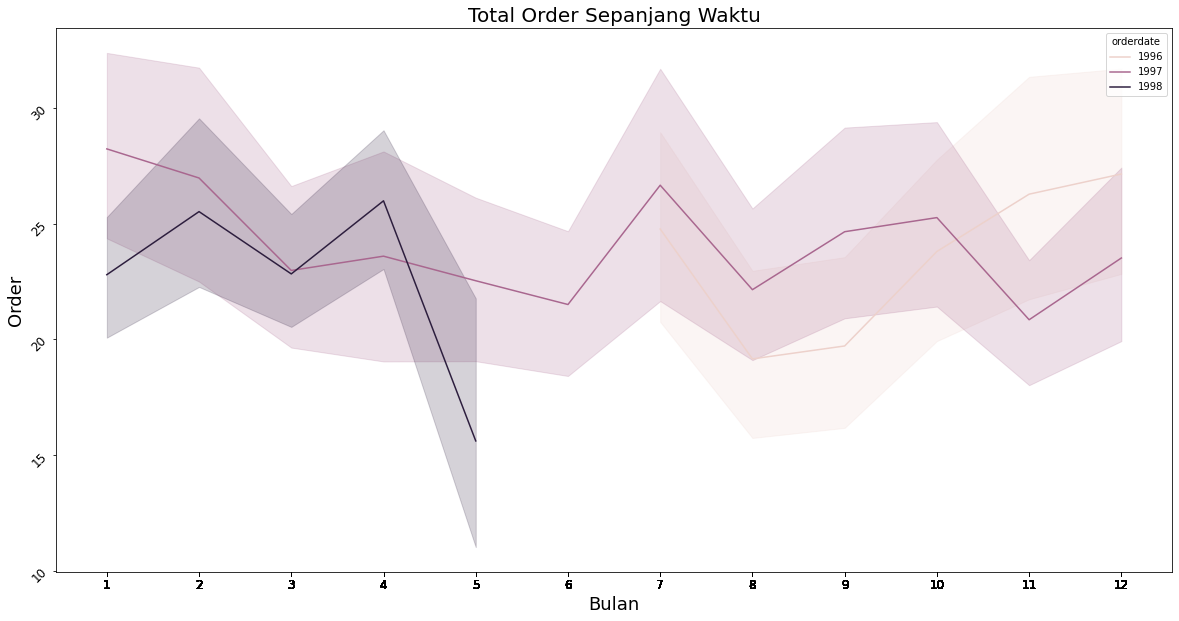

In [ ]:
# Line Plot Sales Each Month

plt.figure(figsize=(20,10))
sns.lineplot(data=tabel1, x=pd.DatetimeIndex(tabel1['orderdate']).month, y='quantity', hue = pd.DatetimeIndex(tabel1['orderdate']).year)
plt.title('Total Order Sepanjang Waktu', size = 20)
plt.xlabel('Bulan', size = 18)
plt.ylabel('Order', size = 18)
plt.xticks(pd.DatetimeIndex(tabel1['orderdate']).month, size = 12)
plt.yticks(rotation = 45, size = 12)
plt.show()

Berdasarkan grafik diatas, maka dapat diambil kesimpulan bahwa orderan umumnya meningkat dibulan Februari dan bulan Juli, hal ini bisa menjadi insight untuk tim gudang agar bersiap siap menyiapkan stock di bulan-bulan tersebut.

## **Uji Korelasi Harga Satuan Dengan Jumlah Orderan**

C:\Users\Salsabila\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


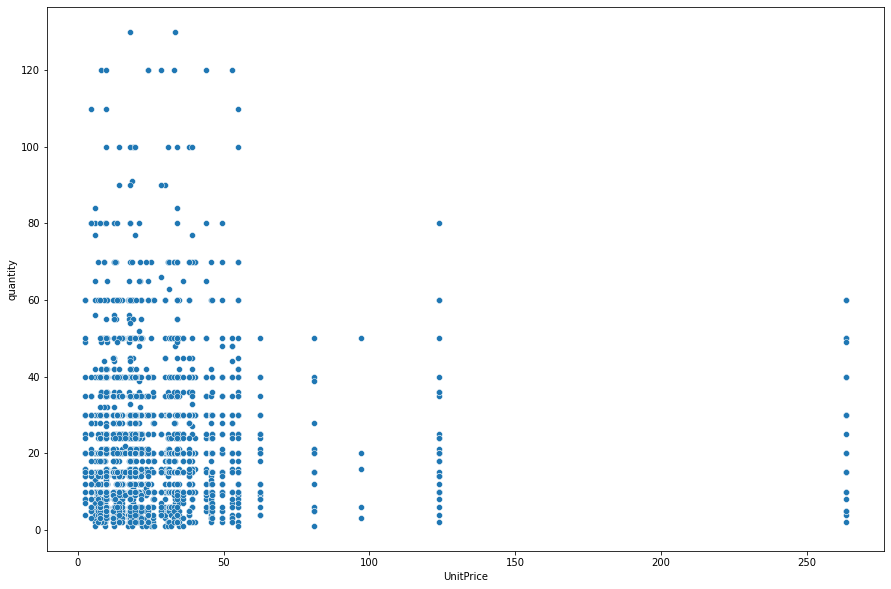

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(tabel1['UnitPrice'], tabel1['quantity'])
plt.show()

Grafik diatas membuktikan bahwa jumlah orderan tidak dipengaruhi oleh harga satuan barang. Hal ini bisa menjawab pertanyaan diatas, bisa jadi total sales rendah bukan karena faktor harga yang mahal, namun lebih ke kebutuhan atau frekuensi pelanggan dalam membeli kateogori tertentu.

## **STATISTIC**

## **1. Uji Perbandingan Nilai Rata Rata Orderan Tiap Kategori**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## **Analysis 1: Normality Asessment**

<function matplotlib.pyplot.show(close=None, block=None)>

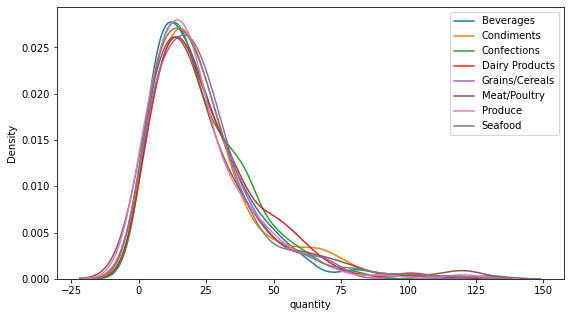

In [ ]:
category = ['Beverages', 'Condiments', 'Confections', 'Dairy Products', 'Grains/Cereals', 'Meat/Poultry', 'Produce', 'Seafood']

plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
for i in category:
       sns.distplot(tabel1[tabel1['categoryname'] == i]['quantity'], hist = False, label = i)
plt.legend(loc="upper right")
plt.show


Grafik tidak terdistribusi normal, melainkan right skewed.


## **Analysis 2: Kolmogorov Smirnov**

In [ ]:
from scipy.stats import kstest
category = ['Beverages', 'Condiments', 'Confections', 'Dairy Products', 'Grains/Cereals', 'Meat/Poultry', 'Produce', 'Seafood']

for i in category:
       statistic, pvalue = kstest(tabel1['quantity'], 'norm')

print(f'pvalue = {pvalue}')
print(f'statistic = {statistic}')


pvalue = 0.0
statistic = 0.9693612369613336


Dari data diatas dapat disimpulkan bahwa nilai p.value lebih kecil dari 0.05, maka kita akan menolak H0, maka data tidak mengikuti distribusi normal. Oleh karena itu kita akan menggunakan hypothesis testing untuk non parametrik


## **Analysis 3: Kruskal-Wall Test**


1. h0: rata-rata orderan yang masuk antar category kurang lebih sama namun tidak bisa ditentukan yang sama <br> 
2. ha: rata-rata orderan yang masuk antar category tidak sama <br>

In [ ]:
#import library
from scipy.stats import kruskal

#kruskal test
krus, pvalkrus = kruskal(tabel1[tabel1['categoryname'] == 'Beverages']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Condiments']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Confections']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Dairy Products']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Grains/Cereals']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Meat/Poultry']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Produce']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Seafood']['quantity'],
)

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pvalkrus} < 0.05)')
    print ('Rata-rata order antar kategori tidak sama')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pvalkrus} > 0.05)')
    print ('Rata-rata order antar kategori sama')

Gagal Tolak H0 Karena P-Value (0.5642938672733733 > 0.05)
Rata-rata order antar kategori sama



Pada case ini berarti kita akan menerima H0, rata-rata order antar kategori sama.